In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt

In [ ]:
num_samples = 1000  
num_classes = 10   
X_train = np.random.rand(num_samples, 224, 224, 3).astype(np.float32)  
y_train = np.random.randint(0, num_classes, num_samples)  

print("X_train shape:", X_train.shape) 
print("y_train shape:", y_train.shape) 

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.summary()


In [ ]:
# Freeze the lower convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Check which layers are frozen
frozen_layers = [layer.name for layer in base_model.layers if not layer.trainable]
print("Frozen layers:", frozen_layers)

In [ ]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Adjust the number of classes as needed

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Unfreeze some of the last convolutional layers for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze last 20 layers; adjust as needed
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Continue training with fine-tuning
fine_tune_history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


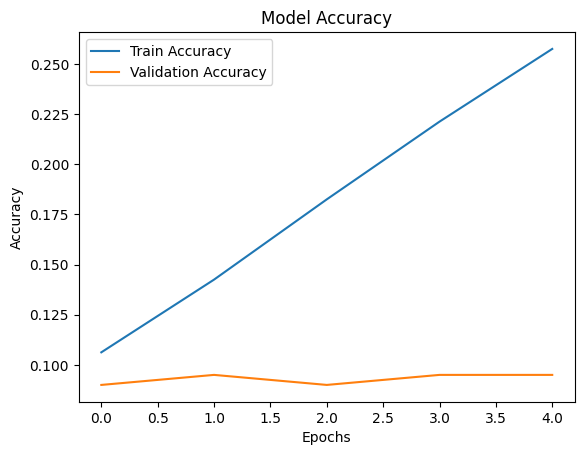

In [ ]:
plt.plot(fine_tune_history.history['accuracy'], label='Train Accuracy')
plt.plot(fine_tune_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()